In [1]:
import numpy as np
import torch
import cv2
import json
from pathlib import Path
from PIL import Image
from typing import Any, Callable, Dict, List, Optional, Tuple, cast
import os
import random
from lib import *
from dataset import Dataset_Base
from model import VIOLET_Base
from agent import Agent_Base

In [ ]:
class Dataset_Retrieval(Dataset_Base):
    def __init__(self, args, split):
        super().__init__(args)
        
        self.img = pickle.load(open('./_data/img_%s.pkl'%(self.args['dataset']), 'rb'))
        self.txt = json.load(open('./_data/txt_%s.json'%(self.args['task']), 'r'))[split]
        
    def __len__(self):
        return len(self.txt)
    
    def __getitem__(self, idx):
        item = self.txt[idx]
        
        img = []
        for b in self.img[item['video']]:
            # img.append(self.str2img(b).unsqueeze(0))
            img.append(b)
        # img = T.cat(img, dim=0)
        
        txt, mask = self.str2txt(item['caption'])
        
        return img, txt, mask


In [ ]:
args = {
    "path_ckpt": "./_data/ckpt_violet_pretrain.pt",
    "dataset" : "msrvtt",
    "task" : "msrvtt-retrieval",
    "size_img": 224,
    "size_txt": 25,
    "batch_size" : 6
}

In [ ]:
data_train, data_val, data_test = [torch.utils.data.DataLoader(Dataset_Retrieval(args, split),
                                                                batch_size = args['batch_size'],
                                                                shuffle = (split == 'train'),
                                                                num_workers = 32,
                                                            )
                                    for split in ['train', 'val', 'test']]

In [ ]:
example_img_path = Path('/home/jianghui/dataset/VideoReorder-MovieNet/example/in_domain_2830/', '2830_0.jpg')
example_img_Image = Image.open(example_img_path)
display(example_img_Image), example_img_Image.size

In [ ]:
for img, text, mask in tqdm(data_train, ascii=True):
    print('img[0][0] is\n', img[0][0])
    print('img[0][0] type is\n', type(img[0][0]))
    img_Image = Image.open(io.BytesIO(base64.b64decode(img[0][0]))).convert('RGB')
    display(img_Image)
    print(img_Image.size)
    # print('text is\n', text)
    # print('mask is\n', mask)
    break


In [ ]:
# See .pkl
dataset_pkl = pickle.load(open('./_data/img_msrvtt.pkl', 'rb'))
for i in dataset_pkl:
    print(i)

In [ ]:
x = xrange(10)
x

In [ ]:
pbar = tqdm(["a", "b", "c", "d"])
for char in pbar:
    time.sleep(2)
    pbar.set_description("Processing %s" % char)
pbar.close()

  0%|          | 0/7068 [00:00<?, ?it/s]

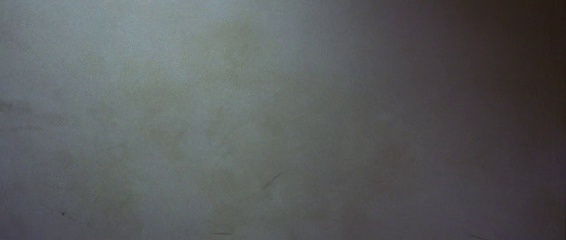

[]


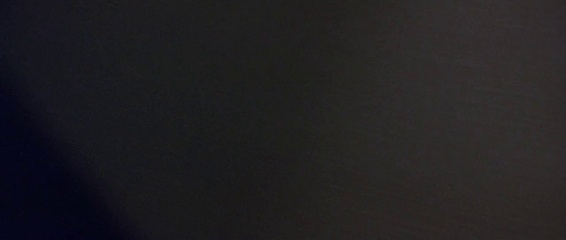

['Go, man, go! Come on...']


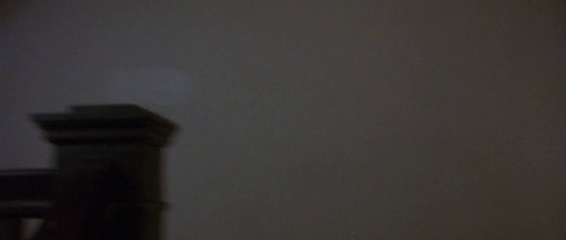

['The fucking doors are locked!']


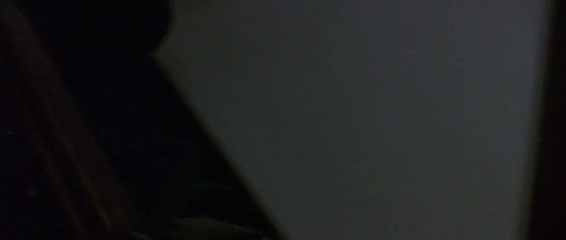

['Come on! Come on!']


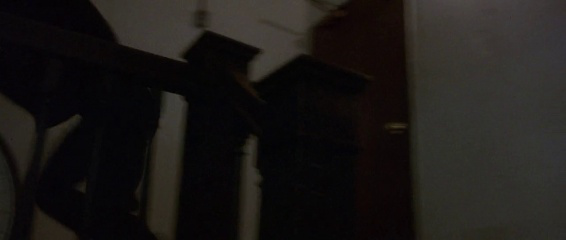

['Where are the cops, man?']


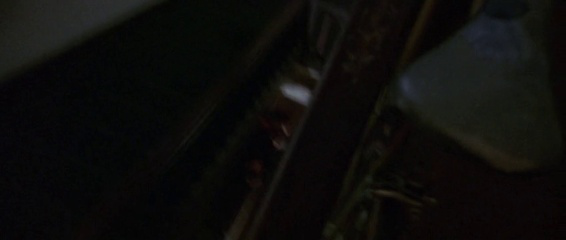

['Fuck you!']


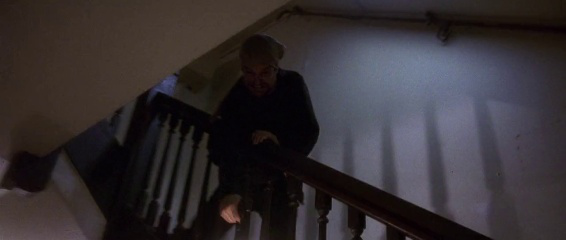

['- What are you doing, man? - Go, man! Just go!']


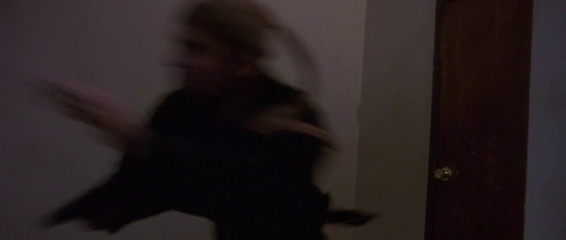

['Shit!']


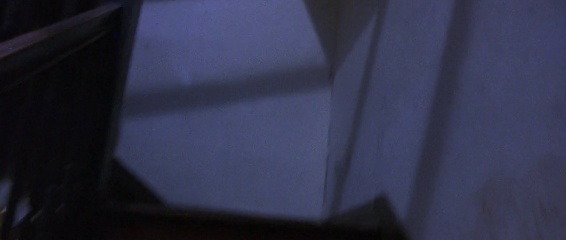

[]


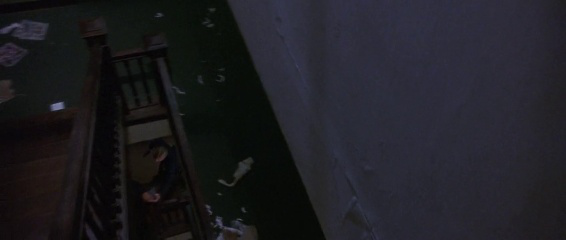

["- Drop your weapon! - Come on! They're right behind us!"]


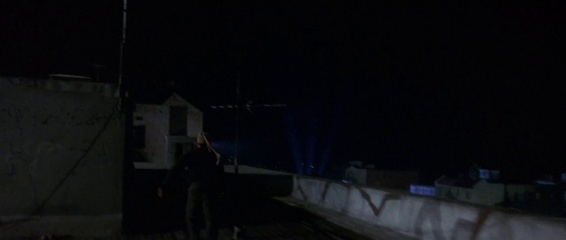

['- Come on! Come on! - Oh, shit!']


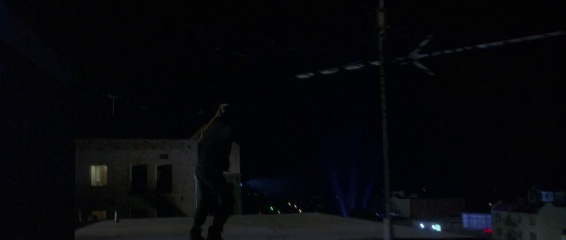

  0%|          | 0/7068 [00:00<?, ?it/s]

["- Go, man! - Come on. Let's go."]


AssertionError: 

In [2]:
import numpy as np
import torch
import cv2
import json
from pathlib import Path
from PIL import Image
from typing import Any, Callable, Dict, List, Optional, Tuple, cast
import os
import random
from lib import *
from dataset import Dataset_Base
from model import VIOLET_Base
from agent import Agent_Base
from utils.dataset import *

data_path = '/home/jianghui/dataset/VideoReorder-MovieNet'
split = 'train'
train_data = VideoReorderMovieNetDataFolder(data_path, split)
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=(split == 'train'), num_workers=1, pin_memory=True, collate_fn=lambda x: x)

for data in tqdm(train_dataloader):
    # print("data shape is", np.array(data).shape)
    for img_list, text_list in data:
        for img, text in zip(img_list, text_list):
            # display(img)
            # print(text)
            pass


In [3]:
a = lambda x: x
a([10, 10])

[10, 10]